In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tweets/sample_submission.csv
/kaggle/input/tweets/train.csv
/kaggle/input/tweets/test.csv


In [3]:
train_df=pd.read_csv("/kaggle/input/tweets/train.csv",usecols=['id','text','target'])
test_df=pd.read_csv("/kaggle/input/tweets/test.csv", usecols=['id','text'])
sample_df=pd.read_csv("/kaggle/input/tweets/sample_submission.csv")

In [4]:
train_df.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
test_df.head()

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
train_df.shape

(7613, 3)

In [7]:
test_df.shape

(3263, 2)

In [8]:
!pip install text_hammer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.12.2
    Uninstalling beautifulsoup4-4.12.2:
      Successfully uninstalled beautifulsoup4-4.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
libpysal 4.9.2 requires beautifulsoup4>=4.10, but you have beautifulsoup4 4.9.1 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.


In [9]:
import text_hammer as th

In [10]:
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

def text_processing(df,col_name):
    column=col_name
    df[column]=df[column].progress_apply(lambda x: str(x).lower())
    df[column]=df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column]=df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column]=df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column]=df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    return(df)

In [11]:
train_cleaned_df=text_processing(train_df,'text')

  0%|          | 0/7613 [00:00<?, ?it/s]

  0%|          | 0/7613 [00:00<?, ?it/s]

  0%|          | 0/7613 [00:00<?, ?it/s]

  0%|          | 0/7613 [00:00<?, ?it/s]

  0%|          | 0/7613 [00:00<?, ?it/s]

In [12]:
train_df=train_cleaned_df.copy()

In [13]:
train_df.target.value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [14]:
!pip install transformers

In [15]:
from transformers import AutoTokenizer,TFBertModel
tokenizer=AutoTokenizer.from_pretrained('bert-large-uncased')
bert=TFBertModel.from_pretrained('bert-large-uncased')

2024-02-12 14:50:21.444180: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-12 14:50:21.444279: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-12 14:50:21.603007: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [16]:
print("max length:",max([len(x.split()) for x in train_df.text]))

max length: 31


In [17]:
x_train=tokenizer(
text=train_df.text.tolist(),
add_special_tokens=True,
max_length=36,
truncation=True,
padding=True,
return_tensors='tf',
return_token_type_ids=False,
return_attention_mask=True,
)

In [18]:
x_train

{'input_ids': <tf.Tensor: shape=(7613, 36), dtype=int32, numpy=
array([[  101,  2256, 15616, ...,     0,     0,     0],
       [  101,  3224,  2543, ...,     0,     0,     0],
       [  101,  2035,  3901, ...,     0,     0,     0],
       ...,
       [  101, 23290,  2683, ...,     0,     0,     0],
       [  101,  2610, 11538, ...,     0,     0,     0],
       [  101,  1996,  6745, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(7613, 36), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [19]:
x_train['input_ids'].shape

TensorShape([7613, 36])

In [20]:
x_train['attention_mask'].shape

TensorShape([7613, 36])

In [21]:
tokenizer("My name is varshini")

{'input_ids': [101, 2026, 2171, 2003, 13075, 17426, 2072, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}

In [22]:
y_train=train_df.target.values
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [23]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy,BinaryCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy,BinaryAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

In [24]:
max_len=36
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense
input_ids=Input(shape=(max_len,),dtype=tf.int32, name="input_ids")
input_mask=Input(shape=(max_len,),dtype=tf.int32,name="attention_mask")
embeddings=bert([input_ids,input_mask])[1]
#Index 0 typically refers to the sequence output, 
#which provides the embeddings for each token in the input sequence.
#Index 1 usually refers to the pooled output,
#which is a representation of the entire input sequence. 
#This pooled output is often used as a contextualized embedding
#for the entire input sequence and is useful for downstream tasks like text classification.

out=tf.keras.layers.Dropout(0.1)(embeddings)
out=Dense(128,activation='relu')(out)
out=tf.keras.layers.Dropout(0.1)(out)
out=Dense(32,activation='relu')(out)
y=Dense(1,activation='sigmoid')(out)
model=tf.keras.Model(inputs=[input_ids,input_mask],outputs=y)
model.layers[2].trainable=True


In [25]:
optimizer=Adam(
learning_rate=5e-06,
epsilon=1e-08,

clipnorm=1.0)
loss=BinaryCrossentropy(from_logits=True)
metric=BinaryAccuracy('accuracy'),
model.compile(
optimizer=optimizer,
loss=loss,
metrics=metric)

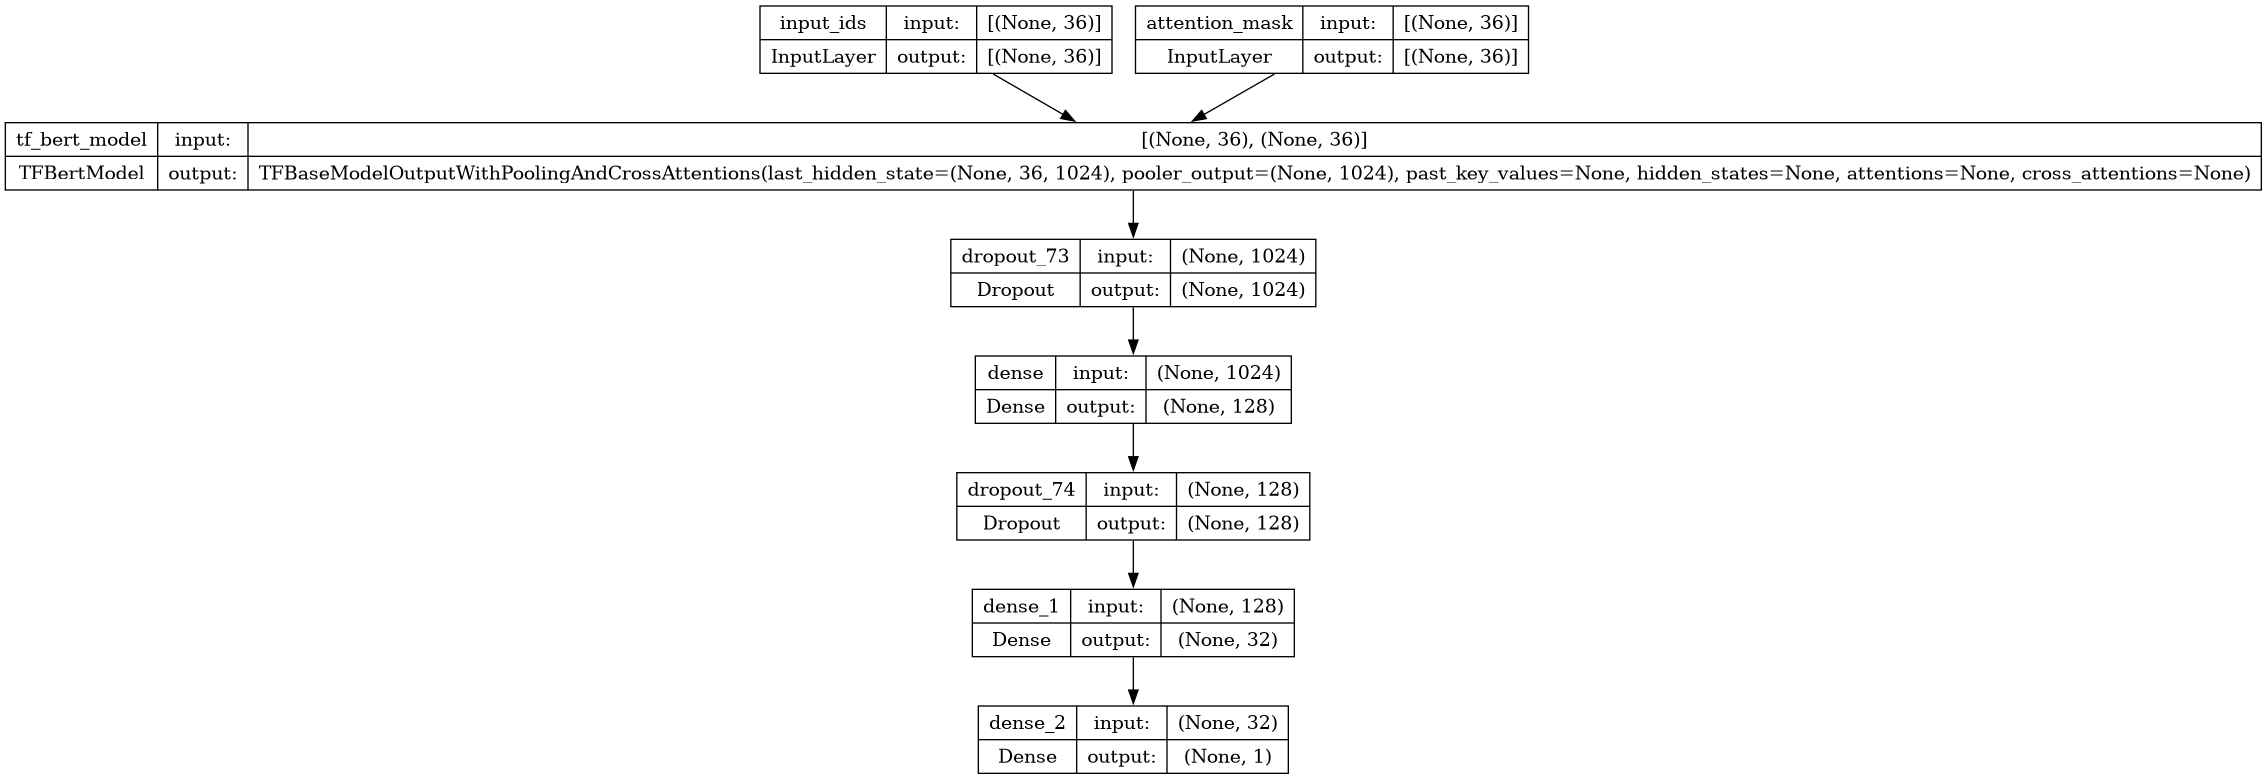

In [26]:
plot_model(model,show_shapes=True)

In [27]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [28]:
train_history=model.fit(
x={'input_ids':x_train['input_ids'],'attention_mask':x_train['attention_mask']},
 y=y_train,
    epochs=10,
    batch_size=10)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
I0000 00:00:1707749621.672219     121 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


762/762 [==============================] - 382s 358ms/step - loss: 0.4750 - accuracy: 0.7846
Epoch 2/10
762/762 [==============================] - 268s 352ms/step - loss: 0.3681 - accuracy: 0.8570
Epoch 3/10
762/762 [==============================] - 268s 352ms/step - loss: 0.2966 - accuracy: 0.8886
Epoch 4/10
762/762 [==============================] - 268s 352ms/step - loss: 0.2337 - accuracy: 0.9155
Epoch 5/10
762/762 [==============================] - 268s 352ms/step - loss: 0.1726 - accuracy: 0.9398
Epoch 6/10
762/762 [==============================] - 268s 352ms/step - loss: 0.1409 - accuracy: 0.9503
Epoch 7/10
762/762 [==============================] - 268s 352ms/step - loss: 0.1163 - accuracy: 0.9619
Epoch 8/10
762/762 [==============================] - 268s 352ms/step - loss: 0.0986 - accuracy: 0.9648
Epoch 9/10
762/762 [==============================] - 269s 353ms/step - loss: 0.0893 - accuracy: 0.9674
Epoch 10/10
762/762 [==============================] - 268s 352ms/step - lo

In [30]:
test_df

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...
3258,10861,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,Storm in RI worse than last hurricane. My city...
3260,10868,Green Line derailment in Chicago http://t.co/U...
3261,10874,MEG issues Hazardous Weather Outlook (HWO) htt...


In [31]:
test_df=text_processing(test_df,'text')

  0%|          | 0/3263 [00:00<?, ?it/s]

  0%|          | 0/3263 [00:00<?, ?it/s]

  0%|          | 0/3263 [00:00<?, ?it/s]

  0%|          | 0/3263 [00:00<?, ?it/s]

  0%|          | 0/3263 [00:00<?, ?it/s]

In [32]:
x_test=tokenizer(
text=test_df.text.tolist(),
add_special_tokens=True,
max_length=36,
truncation=True,
padding=True,
return_tensors='tf',
return_token_type_ids=False,
return_attention_mask=True,
    verbose=True
)

In [33]:
predicted=model.predict({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']})

102/102 [==============================] - 33s 261ms/step


In [34]:
predicted.shape

(3263, 1)

In [35]:
ans=tokenizer('The picture is not good')

In [1]:
model.predict({'input_ids':ans['input_ids'],'attention_mask':ans['attention_mask']})

NameError: name 'model' is not defined

In [36]:
y_predicted=np.where(predicted>0.5,1,0)

In [37]:
y_predicted.shape

(3263, 1)

In [38]:
sample_df['id']=test_df.id
sample_df['target']=y_predicted

In [45]:
sample_df.to_csv('submission1.csv',index=False)

In [39]:
model.save('/kaggle/working/')